In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
#ReLU activation function
def relu(x):
    return np.maximum(0, x)

# derivative of ReLU activation function
def relu_derivative(x):
    return np.where(x <= 0, 0, 1)

#Softmax activation function
def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

# derivative of Softmax activation function
def softmax_derivative(x):
    return x * (1 - x)

In [3]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.biases_input_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        self.biases_hidden_output = np.zeros((1, output_size))
        
        # Lists to store loss values
        self.loss_history = []
    
    def forward(self, X):
        self.hidden_output = relu(np.dot(X, self.weights_input_hidden) + self.biases_input_hidden)
        self.output = softmax(np.dot(self.hidden_output, self.weights_hidden_output) + self.biases_hidden_output)
        return self.output
    
    def backward(self, X, y):
        output_error = self.output - y
        delta_output = output_error * softmax_derivative(self.output)
        
        hidden_error = delta_output.dot(self.weights_hidden_output.T)
        delta_hidden = hidden_error * relu_derivative(self.hidden_output)
        
        self.weights_hidden_output -= self.hidden_output.T.dot(delta_output) * self.learning_rate
        self.biases_hidden_output -= np.sum(delta_output, axis=0, keepdims=True) * self.learning_rate
        self.weights_input_hidden -= X.T.dot(delta_hidden) * self.learning_rate
        self.biases_input_hidden -= np.sum(delta_hidden, axis=0, keepdims=True) * self.learning_rate
    
    def train(self, X, y, epochs):
        for i in range(epochs):
            output = self.forward(X)
            loss = -np.sum(y * np.log(output + 1e-12)) / len(X) # Adding a small value to avoid log(0)
            self.loss_history.append(loss)
            self.backward(X, y)
            if i % 100 == 0:
                print(f"Epoch {i+1}, Loss: {loss}")
    
    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

Epoch 1, Loss: 1.0986626117689016
Epoch 101, Loss: 0.9639121924100019
Epoch 201, Loss: 0.5574573919852369
Epoch 301, Loss: 0.3948483668062373
Epoch 401, Loss: 0.2944229394177072
Epoch 501, Loss: 0.23179055424911468
Epoch 601, Loss: 0.1939302266312962
Epoch 701, Loss: 0.1697161468897491
Epoch 801, Loss: 0.15312524017700865
Epoch 901, Loss: 0.14108170167821574


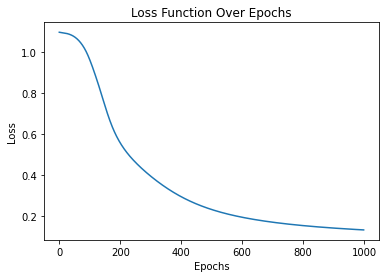

In [4]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode target labels
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train MLP
input_size = X_train.shape[1]
hidden_size = 64
output_size = y_train.shape[1]
mlp = MLP(input_size, hidden_size, output_size, learning_rate=0.001)
mlp.train(X_train, y_train, epochs=1000)

# Make predictions on test set
predictions = mlp.predict(X_test)

# Plot loss function over epochs
plt.plot(range(len(mlp.loss_history)), mlp.loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function Over Epochs')
plt.show()